Titanic: Machine Learning from Disaster

Predict survival on the Titanic

Defining the problem statement

Collecting the data

Exploratory data analysis

Feature engineering

Modelling

Testing

#Understanding the Dataset

In [329]:
# All the imports

import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt

%matplotlib inline


from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from xgboost import XGBClassifier


from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.metrics import log_loss, fbeta_score, make_scorer, confusion_matrix, roc_curve
from sklearn.calibration import CalibratedClassifierCV


from tqdm import tqdm


from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [330]:
db = pd.read_csv('C:\\Users\\kondam2\\OneDrive - Medtronic PLC\\Desktop\\All Pred\\Pread\\Titanic Dataset Project\\Notebook\\Data\\train.csv')
dt = pd.read_csv('C:\\Users\\kondam2\\OneDrive - Medtronic PLC\\Desktop\\All Pred\\Pread\\Titanic Dataset Project\\Notebook\\Data\\test.csv')


In [331]:
db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [332]:
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [333]:
print(db.shape)
print(dt.shape)

(891, 12)
(418, 11)


In [334]:
print(db.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [335]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [336]:
print("no of features of train data ",len(db.columns))
print("no of features test data",len(dt.columns))

no of features of train data  12
no of features test data 11


Insight:Survived is my independent feature which we have to make the prediction

In [337]:
db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [338]:
print(db.isna().sum())
print("---------")
print(dt.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [339]:
db['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [340]:
print(db['Cabin'].isnull().sum()/len(db))

0.7710437710437711


77% of passengers had no cabin. Only 23 % passangers had cabin and this could be dropped 

In [341]:
print(db['Age'].isnull().sum()/len(db))

0.19865319865319866


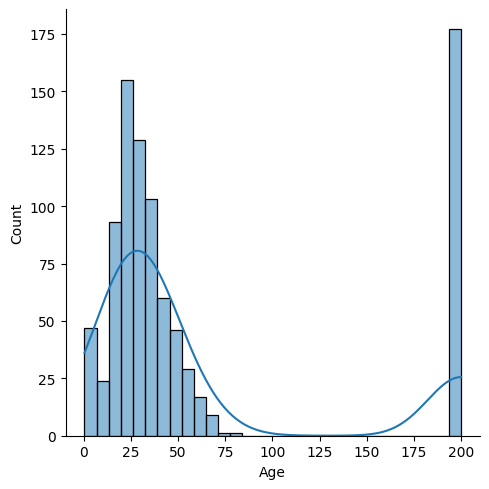

In [342]:
sns.displot(db['Age'].fillna(200),kde = True)

Only 20 % of Age data is missing we can replace with mean 

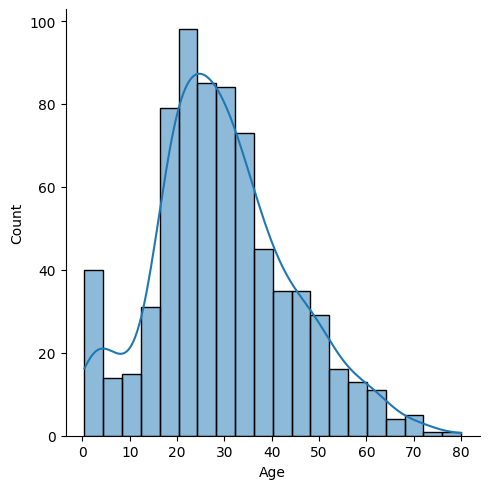

In [343]:
sns.displot(db['Age'],kde = True)

Lets Explore further

In [344]:
Survivors = db['Survived'].sum()
Unsurvivors = len(db) - Survivors
print("Survivors", Survivors)
print("Unsurvivors", Unsurvivors)

Survivors 342
Unsurvivors 549


In [345]:
per_survivors = Survivors/len(db)*100
print("Percentage of Survivors " , per_survivors , "%")

Percentage of Survivors  38.38383838383838 %


<function matplotlib.pyplot.show(close=None, block=None)>

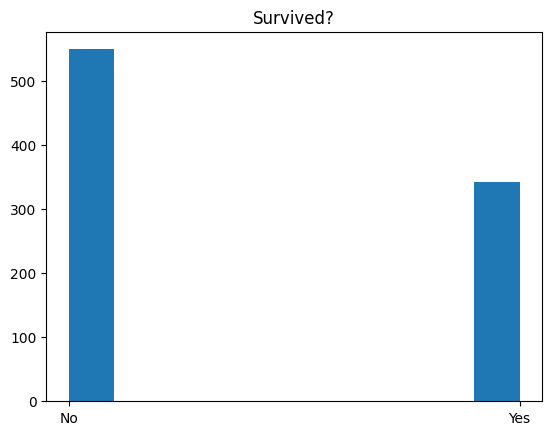

In [346]:
plt.hist(db['Survived'])
plt.title("Survived?")
plt.xticks(np.arange(2),('No','Yes'))
plt.show

Feature Exploration

In [347]:
list_features = db.columns
for f in list_features:
    print("feature", f , "||Type:", type(db[f][0]), "unique features",len(db[f].unique()))

feature PassengerId ||Type: <class 'numpy.int64'> unique features 891
feature Survived ||Type: <class 'numpy.int64'> unique features 2
feature Pclass ||Type: <class 'numpy.int64'> unique features 3
feature Name ||Type: <class 'str'> unique features 891
feature Sex ||Type: <class 'str'> unique features 2
feature Age ||Type: <class 'numpy.float64'> unique features 89
feature SibSp ||Type: <class 'numpy.int64'> unique features 7
feature Parch ||Type: <class 'numpy.int64'> unique features 7
feature Ticket ||Type: <class 'str'> unique features 681
feature Fare ||Type: <class 'numpy.float64'> unique features 248
feature Cabin ||Type: <class 'float'> unique features 148
feature Embarked ||Type: <class 'str'> unique features 4


In [348]:
db["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [349]:
db["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [350]:
db["Embarked"].unique()

#Replace the Nan value

array(['S', 'C', 'Q', nan], dtype=object)

In [351]:
db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
db[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by = 'Survived',ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Upperclass passengers have survived more

In [353]:
db[['Sex','Survived']].groupby('Sex').mean().sort_values(by = 'Survived',ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


Females have survived than men

In [354]:
db[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by = 'Survived',ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Being from Cherbourg is a factor a survival. Southampton decreases your chance of survival. This is surprising!

In [355]:
db[['Embarked','Pclass']].groupby('Embarked').mean().sort_values(by = 'Pclass',ascending = False)

,Pclass
Embarked,
Q,2.909091
S,2.350932
C,1.886905


Cherboug people settled in Class 1

In [356]:
title_mapping = {"male": 1, "female": 0}
db_ = db.copy()
db_['Sex'] = db_['Sex'].map(title_mapping)
print(db_[['Embarked', 'Sex']].groupby('Embarked').mean().sort_values(by='Sex', ascending=False))
del(db_)

               Sex
Embarked          
S         0.684783
C         0.565476
Q         0.532468


As males are more in S this implies why we have got survival rate of S low

In [357]:
db[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by = 'Survived',ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [358]:
db[['Parch','Survived']].groupby('Parch').mean().sort_values(by = 'Survived',ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Big family low survival

In [359]:
# Filter numeric columns
numeric_db = db.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_db.corr()

In [360]:
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


"Survived" and "Fare" have a moderate positive correlation (0.257).

"Pclass" and "Fare" have a strong negative correlation (-0.549), indicating that higher Pclass (which likely indicates higher class) is associated with lower Fare prices.

"SibSp" and "Parch" have a moderate positive correlation (0.415), meaning that passengers traveling with more siblings/spouses tend to also travel with more parents/children.

"Age" and "Pclass" have a moderate negative correlation (-0.331), which might suggest that younger passengers tend to be in higher classes.

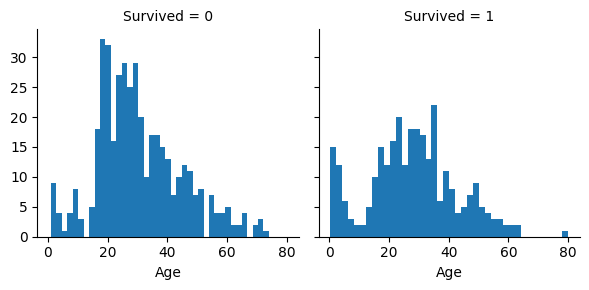

In [361]:
num = sns.FacetGrid(db, col='Survived')
print(num.map(plt.hist, 'Age', bins=40))

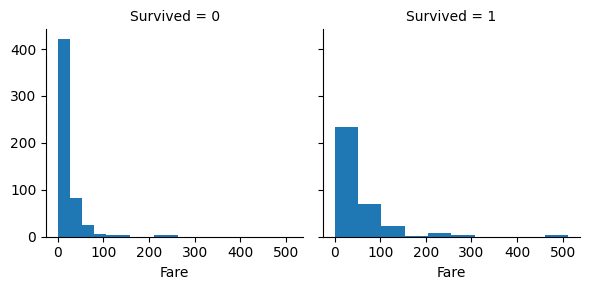

In [362]:
num = sns.FacetGrid(db, col='Survived')
print(num.map(plt.hist, 'Fare', bins=10))

Younger and older people survived.

The middle age (20-40) people did not survive.

We should consider the age as predicator

Fare is less clear

2. Feature Engineering

Passenger id

In [363]:
#Passenger id is not need so we can remove
db = db.drop('PassengerId', axis=1)

Pclass

In [364]:
db['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [ ]:
#ordering of Pclass
mapping_pclass = {1:1, 2:0, 3:-1}
db['Pclass'] = db['Pclass'].map(mapping_pclass)
dt['Pclass'] = dt['Pclass'].map(mapping_pclass)

In [366]:
db['Pclass'].unique()

array([-1,  1,  0], dtype=int64)

Name

In [368]:
def get_title(var):
    """
    This function takes as input the name and returns the title of the people. 
    
    """
    title = var.split(',')[1]
    title2 = title.split('.')[0]
    return title2[1:]

In [370]:
db['Title'] = db.apply(lambda x: get_title(x['Name']),axis=1)
dt['Title'] = dt.apply(lambda x: get_title(x['Name']),axis=1)

In [374]:
print(db['Title'].unique())
print(dt['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [375]:
print(db.groupby('Title').count().sort_values(by='Survived', ascending=False)['Pclass'])
print('-------------')
print('-------------')
print(dt.groupby('Title').count().sort_values(by='Name', ascending=False)['Pclass'])

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Pclass, dtype: int64
-------------
-------------
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Pclass, dtype: int64


In [381]:
print(db.groupby('Title').count().sort_values(by='Survived', ascending=False)['Ticket'])
print('-------------')
print('-------------')
print(dt.groupby('Title').count().sort_values(by='Name', ascending=False)['Ticket'])

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Ticket, dtype: int64
-------------
-------------
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Ticket, dtype: int64


In [384]:
#mapping of the title
#the mapping is defined with the following dictionnary 

title_map = {'Mlle':'Miss','Ms':'Miss','Mlle':'Miss', 
             'Mme':'Mrs', 
             'Dr':'Other','Rev':'Other', 'Major':'Other', 'Col':'Other', 'Sir':'Other', 'Dona':'Other',
             'Capt':'Other', 'Lady':'Other','Jonkheer':'Other', 'Don':'Other', 'the Countess':'Other',
            'Mr':'Mr',
            'Miss':'Miss',
            'Mrs':'Mrs',
            'Master':'Master'}

db['Title'] = db['Title'].map(title_map)
dt['Title'] = dt['Title'].map(title_map)

db.drop('Name', axis=1, inplace = True)
dt.drop('Name', axis=1, inplace = True)

In [386]:
db[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Mr,0.156673


In [388]:
print(db.groupby(['Sex', 'Title']).count().Pclass)
print('---------------')
print('---------------')
print(dt.groupby(['Sex', 'Title']).count().Pclass)

Sex     Title 
female  Miss      185
        Mrs       126
male    Master     40
        Mr        517
Name: Pclass, dtype: int64
---------------
---------------
Sex     Title 
female  Miss       79
        Mrs        72
        Other       1
male    Master     21
        Mr        240
        Other       5
Name: Pclass, dtype: int64


Age

In [367]:
db['Age'].mean()
mean_age = db['Age'].mean()
db['Age'].fillna(mean_age, inplace=True)
print(db['Age'].isnull().sum()/len(db))

0.0
